In [107]:
# things we need for NLP
import nltk
nltk.download('punkt')
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

import numpy as np
import random

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import utils
from keras import layers

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [108]:
# import our chat-bot intents file
import json
with open('intents.json') as json_data:
    intents = json.load(json_data)

In [109]:
words = []
classes = []
documents = []
ignore_words = ['?']
# loop through each sentence in our intents patterns
for intent in intents['intents']:
    for pattern in intent['patterns']:
        pattern = pattern.lower()
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# lemmatize and lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# remove duplicates
classes = sorted(list(set(classes)))

print (len(documents), "documents",documents)
print (len(classes), "classes", classes)
print (len(words), "unique lemmatized words", words)

668 documents [(['hi'], 'greeting'), (['how', 'are', 'you'], 'greeting'), (['is', 'anyone', 'there', '?'], 'greeting'), (['hello'], 'greeting'), (['good', 'day'], 'greeting'), (['hey'], 'greeting'), (['sup'], 'greeting'), (['whatsup'], 'greeting'), (['hello', 'there'], 'greeting'), (['whats', 'up'], 'greeting'), (['bye'], 'goodbye'), (['see', 'you', 'later'], 'goodbye'), (['goodbye'], 'goodbye'), (['get', 'lost'], 'goodbye'), (['bubye'], 'goodbye'), (['bye', 'bye'], 'goodbye'), (['tata'], 'goodbye'), (['see', 'you'], 'goodbye'), (['nice', 'meeting', 'you'], 'goodbye'), (['thanks'], 'thanks'), (['thank', 'you'], 'thanks'), (['that', "'s", 'helpful'], 'thanks'), (['thanks', 'a', 'lot'], 'thanks'), (['thanks', 'a', 'ton'], 'thanks'), (['ty'], 'thanks'), (['tysm'], 'thanks'), (['thank', 'you', 'so', 'much'], 'thanks'), ([], 'noanswer'), (['what', 'is', 'the', 'college', 'fees', 'at', 'mpstme', '?'], 'generalfeestructure'), (['how', 'much', 'fee', 'is', 'charged', 'for', 'engineering', '?']

In [110]:
# create our training data
training = []
output = []
# create an empty array for our output
output_empty = [0] * len(classes)

# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    #print(classes.index(doc[1]))
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])
    print(pattern_words)

['hi']
['how', 'are', 'you']
['is', 'anyone', 'there', '?']
['hello']
['good', 'day']
['hey']
['sup']
['whatsup']
['hello', 'there']
['whats', 'up']
['bye']
['see', 'you', 'later']
['goodbye']
['get', 'lost']
['bubye']
['bye', 'bye']
['tata']
['see', 'you']
['nice', 'meeting', 'you']
['thanks']
['thank', 'you']
['that', "'s", 'helpful']
['thanks', 'a', 'lot']
['thanks', 'a', 'ton']
['ty']
['tysm']
['thank', 'you', 'so', 'much']
[]
['what', 'is', 'the', 'college', 'fee', 'at', 'mpstme', '?']
['how', 'much', 'fee', 'is', 'charged', 'for', 'engineering', '?']
['what', 'is', 'the', 'fee', 'for', 'engineering', '?']
['what', 'is', 'the', 'fee', 'for', 'different', 'course', '?']
['what', 'is', 'the', 'tuition', 'fee', '?']
['fee', 'structure']
['fee']
['fee', 'for', 'btech']
['fee', 'for', 'mbatech']
['fee', 'for', 'btech', 'integrated']
['fee', 'at', 'mpstme']
['charge']
['tell', 'me', 'about', 'the', 'fee']
['tell', 'me', 'about', 'the', 'fee', 'structure']
['what', 'is', 'the', 'admissio

['skill', 'set', 'required', 'for', 'mechanical']
['should', 'i', 'pursue', 'a', 'mechanical', 'degree']
['skill', 'required', 'for', 'pursuing', 'a', 'mechanical', 'degree']
['why', 'mechanical']
['industry', 'acceptance', 'of', 'mechanical', 'graduate']
['prerequisite', 'for', 'mechatronics', 'engineering']
['skill', 'required', 'for', 'engineering', 'in', 'mechatronics']
['i', 'am', 'confused', 'if', 'i', 'should', 'do', 'engineering', 'in', 'mechatronic', 'engineering']
['i', 'am', 'confused', 'if', 'i', 'should', 'do', 'engineering', 'in', 'mechatronics', 'engineering']
['should', 'i', 'choose', 'b.', 'tech', 'in', 'mechatronics', 'engineering']
['should', 'i', 'choose', 'btech', 'in', 'mechatronics', 'engineering']
['tell', 'me', 'if', 'i', 'should', 'do', 'engineering', 'in', 'mechatronics', 'engineering']
['why', 'should', 'i', 'opt', 'for', 'engineering', 'in', 'mechatronics', '?']
['why', 'mechatronics', 'course']
['why', 'mechatronics', 'engineering']
['why', 'should', 'i', 

In [111]:
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)

# create train and test lists
train_x = list(training[:,0])
train_y = list(training[:,1])

In [112]:
model = Sequential()
model.add(Dense(8, input_shape=[len(train_x[0],)]))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(len(train_y[0]), activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(np.array(train_x), np.array(train_y), epochs=1000, batch_size=8)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 8)                 1632      
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_28 (Dense)             (None, 49)                441       
Total params: 2,217
Trainable params: 2,217
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
668/668 [==============================] - 1s 1ms/step - loss: 3.8798 - acc: 0.0344
Epoch 2/1000
668/668 [==============================] - 0s 214us/step - loss: 3.7796 - acc: 0.0749
Epoch 3/1000
668/668 [==============================] - 0s 203us/step - loss

668/668 [==============================] - 0s 205us/step - loss: 0.0436 - acc: 0.9820
Epoch 75/1000
668/668 [==============================] - 0s 191us/step - loss: 0.0431 - acc: 0.9790
Epoch 76/1000
668/668 [==============================] - 0s 185us/step - loss: 0.0422 - acc: 0.9790
Epoch 77/1000
668/668 [==============================] - 0s 200us/step - loss: 0.0414 - acc: 0.9835
Epoch 78/1000
668/668 [==============================] - 0s 175us/step - loss: 0.0400 - acc: 0.9835
Epoch 79/1000
668/668 [==============================] - 0s 202us/step - loss: 0.0433 - acc: 0.9775
Epoch 80/1000
668/668 [==============================] - 0s 261us/step - loss: 0.0396 - acc: 0.9790
Epoch 81/1000
668/668 [==============================] - 0s 235us/step - loss: 0.0376 - acc: 0.9805
Epoch 82/1000
668/668 [==============================] - 0s 220us/step - loss: 0.0432 - acc: 0.9775
Epoch 83/1000
668/668 [==============================] - 0s 187us/step - loss: 0.0407 - acc: 0.9805
Epoch 84/1000


668/668 [==============================] - 0s 203us/step - loss: 0.0292 - acc: 0.9835
Epoch 156/1000
668/668 [==============================] - 0s 196us/step - loss: 0.0315 - acc: 0.9775
Epoch 157/1000
668/668 [==============================] - 0s 194us/step - loss: 0.0298 - acc: 0.9760
Epoch 158/1000
668/668 [==============================] - 0s 198us/step - loss: 0.0292 - acc: 0.9820
Epoch 159/1000
668/668 [==============================] - 0s 195us/step - loss: 0.0300 - acc: 0.9775
Epoch 160/1000
668/668 [==============================] - 0s 169us/step - loss: 0.0298 - acc: 0.9820
Epoch 161/1000
668/668 [==============================] - 0s 214us/step - loss: 0.0275 - acc: 0.9820
Epoch 162/1000
668/668 [==============================] - 0s 196us/step - loss: 0.0291 - acc: 0.9775
Epoch 163/1000
668/668 [==============================] - 0s 186us/step - loss: 0.0294 - acc: 0.9760
Epoch 164/1000
668/668 [==============================] - 0s 195us/step - loss: 0.0289 - acc: 0.9835
Epoch

668/668 [==============================] - 0s 278us/step - loss: 0.0290 - acc: 0.9790
Epoch 237/1000
668/668 [==============================] - 0s 239us/step - loss: 0.0282 - acc: 0.9790
Epoch 238/1000
668/668 [==============================] - 0s 233us/step - loss: 0.0277 - acc: 0.9820
Epoch 239/1000
668/668 [==============================] - 0s 224us/step - loss: 0.0281 - acc: 0.9790
Epoch 240/1000
668/668 [==============================] - 0s 256us/step - loss: 0.0277 - acc: 0.9820
Epoch 241/1000
668/668 [==============================] - 0s 256us/step - loss: 0.0270 - acc: 0.9820
Epoch 242/1000
668/668 [==============================] - 0s 234us/step - loss: 0.0271 - acc: 0.9805
Epoch 243/1000
668/668 [==============================] - 0s 228us/step - loss: 0.0263 - acc: 0.9805
Epoch 244/1000
668/668 [==============================] - 0s 227us/step - loss: 0.0277 - acc: 0.9805
Epoch 245/1000
668/668 [==============================] - 0s 227us/step - loss: 0.0274 - acc: 0.9760
Epoch

Epoch 317/1000
668/668 [==============================] - 0s 197us/step - loss: 0.0272 - acc: 0.9775
Epoch 318/1000
668/668 [==============================] - 0s 203us/step - loss: 0.0265 - acc: 0.9760
Epoch 319/1000
668/668 [==============================] - 0s 161us/step - loss: 0.0258 - acc: 0.9790
Epoch 320/1000
668/668 [==============================] - 0s 203us/step - loss: 0.0263 - acc: 0.9775
Epoch 321/1000
668/668 [==============================] - 0s 201us/step - loss: 0.0269 - acc: 0.9790
Epoch 322/1000
668/668 [==============================] - 0s 170us/step - loss: 0.0264 - acc: 0.9790
Epoch 323/1000
668/668 [==============================] - 0s 201us/step - loss: 0.0248 - acc: 0.9805
Epoch 324/1000
668/668 [==============================] - 0s 192us/step - loss: 0.0269 - acc: 0.9820
Epoch 325/1000
668/668 [==============================] - 0s 184us/step - loss: 0.0261 - acc: 0.9790
Epoch 326/1000
668/668 [==============================] - 0s 198us/step - loss: 0.0269 - ac

668/668 [==============================] - 0s 198us/step - loss: 0.0254 - acc: 0.9805
Epoch 399/1000
668/668 [==============================] - 0s 184us/step - loss: 0.0253 - acc: 0.9775
Epoch 400/1000
668/668 [==============================] - 0s 201us/step - loss: 0.0255 - acc: 0.9760
Epoch 401/1000
668/668 [==============================] - 0s 195us/step - loss: 0.0251 - acc: 0.9820
Epoch 402/1000
668/668 [==============================] - 0s 185us/step - loss: 0.0268 - acc: 0.9790
Epoch 403/1000
668/668 [==============================] - 0s 172us/step - loss: 0.0264 - acc: 0.9731
Epoch 404/1000
668/668 [==============================] - 0s 205us/step - loss: 0.0262 - acc: 0.9820
Epoch 405/1000
668/668 [==============================] - 0s 193us/step - loss: 0.0251 - acc: 0.9835
Epoch 406/1000
668/668 [==============================] - 0s 171us/step - loss: 0.0252 - acc: 0.9790
Epoch 407/1000
668/668 [==============================] - 0s 204us/step - loss: 0.0250 - acc: 0.9790
Epoch

668/668 [==============================] - 0s 197us/step - loss: 0.0251 - acc: 0.9805
Epoch 479/1000
668/668 [==============================] - 0s 189us/step - loss: 0.0258 - acc: 0.9775
Epoch 480/1000
668/668 [==============================] - 0s 194us/step - loss: 0.0253 - acc: 0.9760
Epoch 481/1000
668/668 [==============================] - 0s 186us/step - loss: 0.0255 - acc: 0.9790
Epoch 482/1000
668/668 [==============================] - 0s 205us/step - loss: 0.0248 - acc: 0.9835
Epoch 483/1000
668/668 [==============================] - 0s 195us/step - loss: 0.0255 - acc: 0.9760
Epoch 484/1000
668/668 [==============================] - 0s 195us/step - loss: 0.0258 - acc: 0.9746
Epoch 485/1000
668/668 [==============================] - 0s 189us/step - loss: 0.0248 - acc: 0.9790
Epoch 486/1000
668/668 [==============================] - 0s 170us/step - loss: 0.0254 - acc: 0.9746
Epoch 487/1000
668/668 [==============================] - 0s 202us/step - loss: 0.0256 - acc: 0.9746
Epoch

668/668 [==============================] - 0s 206us/step - loss: 0.0254 - acc: 0.9731
Epoch 560/1000
668/668 [==============================] - 0s 193us/step - loss: 0.0249 - acc: 0.9805
Epoch 561/1000
668/668 [==============================] - 0s 183us/step - loss: 0.0242 - acc: 0.9775
Epoch 562/1000
668/668 [==============================] - 0s 195us/step - loss: 0.0242 - acc: 0.9775
Epoch 563/1000
668/668 [==============================] - 0s 192us/step - loss: 0.0253 - acc: 0.9775
Epoch 564/1000
668/668 [==============================] - 0s 196us/step - loss: 0.0244 - acc: 0.9805
Epoch 565/1000
668/668 [==============================] - 0s 192us/step - loss: 0.0253 - acc: 0.9775
Epoch 566/1000
668/668 [==============================] - 0s 186us/step - loss: 0.0243 - acc: 0.9790
Epoch 567/1000
668/668 [==============================] - 0s 210us/step - loss: 0.0256 - acc: 0.9775
Epoch 568/1000
668/668 [==============================] - 0s 188us/step - loss: 0.0251 - acc: 0.9805
Epoch

668/668 [==============================] - 0s 208us/step - loss: 0.0245 - acc: 0.9790
Epoch 641/1000
668/668 [==============================] - 0s 193us/step - loss: 0.0244 - acc: 0.9775
Epoch 642/1000
668/668 [==============================] - 0s 195us/step - loss: 0.0248 - acc: 0.9775
Epoch 643/1000
668/668 [==============================] - 0s 183us/step - loss: 0.0253 - acc: 0.9805
Epoch 644/1000
668/668 [==============================] - 0s 194us/step - loss: 0.0249 - acc: 0.9760
Epoch 645/1000
668/668 [==============================] - 0s 192us/step - loss: 0.0256 - acc: 0.9790
Epoch 646/1000
668/668 [==============================] - 0s 196us/step - loss: 0.0250 - acc: 0.9760
Epoch 647/1000
668/668 [==============================] - 0s 209us/step - loss: 0.0246 - acc: 0.9835
Epoch 648/1000
668/668 [==============================] - 0s 191us/step - loss: 0.0245 - acc: 0.9805
Epoch 649/1000
668/668 [==============================] - 0s 198us/step - loss: 0.0239 - acc: 0.9805
Epoch

668/668 [==============================] - 0s 203us/step - loss: 0.0239 - acc: 0.9805
Epoch 721/1000
668/668 [==============================] - 0s 193us/step - loss: 0.0246 - acc: 0.9790
Epoch 722/1000
668/668 [==============================] - 0s 192us/step - loss: 0.0247 - acc: 0.9746
Epoch 723/1000
668/668 [==============================] - 0s 169us/step - loss: 0.0239 - acc: 0.9820
Epoch 724/1000
668/668 [==============================] - 0s 206us/step - loss: 0.0246 - acc: 0.9820
Epoch 725/1000
668/668 [==============================] - 0s 198us/step - loss: 0.0242 - acc: 0.9805
Epoch 726/1000
668/668 [==============================] - 0s 197us/step - loss: 0.0245 - acc: 0.9760
Epoch 727/1000
668/668 [==============================] - 0s 197us/step - loss: 0.0237 - acc: 0.9775
Epoch 728/1000
668/668 [==============================] - 0s 188us/step - loss: 0.0239 - acc: 0.9746
Epoch 729/1000
668/668 [==============================] - 0s 194us/step - loss: 0.0245 - acc: 0.9790
Epoch

668/668 [==============================] - 0s 208us/step - loss: 0.0240 - acc: 0.9805
Epoch 801/1000
668/668 [==============================] - 0s 200us/step - loss: 0.0247 - acc: 0.9805
Epoch 802/1000
668/668 [==============================] - 0s 187us/step - loss: 0.0239 - acc: 0.9805
Epoch 803/1000
668/668 [==============================] - 0s 255us/step - loss: 0.0239 - acc: 0.9746
Epoch 804/1000
668/668 [==============================] - 0s 248us/step - loss: 0.0240 - acc: 0.9760
Epoch 805/1000
668/668 [==============================] - 0s 250us/step - loss: 0.0231 - acc: 0.9775
Epoch 806/1000
668/668 [==============================] - 0s 231us/step - loss: 0.0239 - acc: 0.9805
Epoch 807/1000
668/668 [==============================] - 0s 246us/step - loss: 0.0238 - acc: 0.9835
Epoch 808/1000
668/668 [==============================] - 0s 228us/step - loss: 0.0236 - acc: 0.9760
Epoch 809/1000
668/668 [==============================] - 0s 249us/step - loss: 0.0241 - acc: 0.9775
Epoch

668/668 [==============================] - 0s 204us/step - loss: 0.0233 - acc: 0.9775
Epoch 882/1000
668/668 [==============================] - 0s 201us/step - loss: 0.0245 - acc: 0.9775
Epoch 883/1000
668/668 [==============================] - 0s 197us/step - loss: 0.0242 - acc: 0.9731
Epoch 884/1000
668/668 [==============================] - 0s 186us/step - loss: 0.0236 - acc: 0.9775
Epoch 885/1000
668/668 [==============================] - 0s 196us/step - loss: 0.0235 - acc: 0.9805
Epoch 886/1000
668/668 [==============================] - 0s 200us/step - loss: 0.0235 - acc: 0.9790
Epoch 887/1000
668/668 [==============================] - 0s 162us/step - loss: 0.0241 - acc: 0.9790
Epoch 888/1000
668/668 [==============================] - 0s 203us/step - loss: 0.0251 - acc: 0.9805
Epoch 889/1000
668/668 [==============================] - 0s 204us/step - loss: 0.0242 - acc: 0.9775
Epoch 890/1000
668/668 [==============================] - 0s 167us/step - loss: 0.0249 - acc: 0.9820
Epoch

668/668 [==============================] - 0s 200us/step - loss: 0.0242 - acc: 0.9760
Epoch 963/1000
668/668 [==============================] - 0s 190us/step - loss: 0.0236 - acc: 0.9820
Epoch 964/1000
668/668 [==============================] - 0s 198us/step - loss: 0.0237 - acc: 0.9760
Epoch 965/1000
668/668 [==============================] - 0s 196us/step - loss: 0.0234 - acc: 0.9760
Epoch 966/1000
668/668 [==============================] - 0s 206us/step - loss: 0.0239 - acc: 0.9790
Epoch 967/1000
668/668 [==============================] - 0s 196us/step - loss: 0.0233 - acc: 0.9805
Epoch 968/1000
668/668 [==============================] - 0s 190us/step - loss: 0.0242 - acc: 0.9746
Epoch 969/1000
668/668 [==============================] - 0s 194us/step - loss: 0.0233 - acc: 0.9790
Epoch 970/1000
668/668 [==============================] - 0s 188us/step - loss: 0.0245 - acc: 0.9790
Epoch 971/1000
668/668 [==============================] - 0s 194us/step - loss: 0.0241 - acc: 0.9790
Epoch

In [113]:
model.save('model_ChatBot.h5')

In [114]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc'])

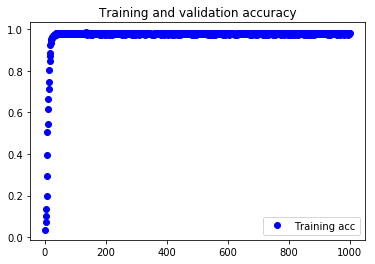

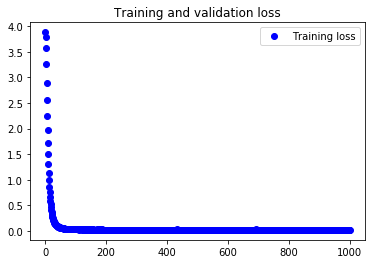

In [115]:
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [116]:
import re
print(syns)
def clean_up_sentence(sentence):
    # tokenize the pattern
    sentence_words = nltk.word_tokenize(sentence)
    
    ''''
    #converting streams to a unique form
    sentence_words = (str(sentence_words).lower())
    sentence_words = re.sub(r"i'm", "i am", sentence_words)
    sentence_words = re.sub(r"he's", "he is", sentence_words)
    sentence_words = re.sub(r"she's", "she is", sentence_words)
    sentence_words = re.sub(r"that's", "that is", sentence_words)
    sentence_words = re.sub(r"what's", "what is", sentence_words)
    sentence_words = re.sub(r"where's", "where is", sentence_words)
    sentence_words = re.sub(r"how's", "how is", sentence_words)
    sentence_words = re.sub(r"\'ll", " will", sentence_words)
    sentence_words = re.sub(r"\'ve", " have", sentence_words)
    sentence_words = re.sub(r"\'re", " are", sentence_words)
    sentence_words = re.sub(r"\'d", " would", sentence_words)
    sentence_words = re.sub(r"n't", " not", sentence_words)
    sentence_words = re.sub(r"won't", "will not", sentence_words)
    sentence_words = re.sub(r"can't", "cannot", sentence_words)
    sentence_words = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", sentence_words)
    sentence_words = re.sub(r"\b-tech", "btech", sentence_words)
    sentence_words = re.sub(r"\b.tech", "btech", sentence_words)
    sentence_words = re.sub(r"\mba-tech", "mbatech", sentence_words)
    sentence_words = re.sub(r"\mba.tech", "mbatech", sentence_words)
    sentence_words = re.sub(r"\b-tech integrated", "btech integrated", sentence_words)
    sentence_words = re.sub(r"\b.tech integrated", "btech integrated", sentence_words)
    sentence_words = re.sub(r"\b.tech int", "btech integrated", sentence_words) '''
    
    # lemmatize each word
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=False):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)

    return(np.array(bag))

[Synset('greeting.n.01'), Synset('greet.v.01'), Synset('greet.v.02'), Synset('greet.v.03'), Synset('greet.v.04')]


In [117]:
p = bow("hello", words)
print (p)
print (classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['CourseB.Tech', 'CourseB.TechInt', 'CourseM.Tech', 'CourseMBATech', 'CourseMCA', 'CoursePGDM', 'CoursePhD', 'accreditation', 'affirmative', 'btechandmbatechadmissions', 'generalfeestructure', 'goodbye', 'greeting', 'hours', 'integratedprograms', 'noanswer', 'offensivewords', 'opentoday', 'otherprogramsadmissions', 'postgradprograms', 'streamCivil', 'streamComputer', 'streamDataScience', 'streamElectrical', 'streamElectronicsandTelecommunications', 'streamIndustrialAutomation', 'streamInformationTechnology', 'streamMechanical', 'streamMechatronics', 'streamartificialintelligence',

In [118]:
d = len(p)
f = len(documents)-2
a = np.zeros([f, d])

In [119]:
tot = np.vstack((p,a))

In [120]:
prediction = model.predict(tot)
predicted_index = np.argmax(prediction)
predicted_index

12